# Model Statistics and Evaluation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re


# Model Statistics 
Create a function to retrieve loss statistics from log.


In [2]:
def retrieve_loss(path):
    loss = open(path,'r').readlines()
    perplexity = []
    accuracy = []
    iterations = []
    
    ppl = '((ppl):( )([0-9])*.([0-9])*)'
    acc = '((acc):(  )([0-9])*.([0-9])*)'
    it = '((Step)( )([0-9])*[-/]([0-9])*)'
    for line in loss:
        p = re.findall(ppl, line)
        i = re.findall(it, line)
        a = re.findall(acc, line)
        if len(p) > 0 and len(i) > 0 and len(a) > 0:
            perplexity.append(float(p[0][0][5:]))
            iterations.append(float(i[0][0][5:-6]))
            accuracy.append(float(a[0][0][5:]))
    loss_stats = [i for i in zip(perplexity,accuracy,iterations)]
    return loss_stats
    



In [48]:
def retrieve_evaluations(path):
    data = open(path,'r').readlines()
    iterations = []
    BLEU = []
    CHRF = []
    
    for line in data:
        if len(line) > 0: 
            if line[:5] == 'pred_':
                iterations.append(float(line[5:]))
            if line[:5] == 'BLEU:':
                BLEU.append(float(line[5:]))
            if line[:5] == 'CHRF:':
                CHRF.append(float(line[5:]))
    m = path.split('/')[-1]
    eval_scores = [i for i in zip(iterations,BLEU,CHRF)]
    eval_scores = pd.DataFrame(eval_scores, columns = ['iterations','BLEU','CHRFpp'] )
    eval_scores = eval_scores.set_index('iterations')
    return eval_scores


# Models trained on the Axoltol Corpus

In [69]:
x = retrieve_evaluations('evaluation/NS_T-1024')
x2 = retrieve_evaluations('evaluation/NS_T-512')
x3 = retrieve_evaluations('evaluation/NS_LSTM')
x4 = retrieve_evaluations('evaluation/SN_T-1024')
x5 = retrieve_evaluations('evaluation/SN_T-512')
x6 = retrieve_evaluations('evaluation/SN_LSTM')

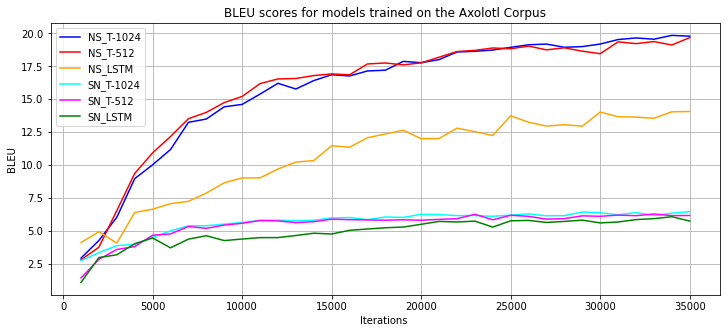

In [70]:
plt.figure(figsize=(12,5))

ax1 = x.BLEU.plot(color='blue', grid=True, label='NS_T-1024')
ax2 = x2.BLEU.plot(color='red', grid=True, label='NS_T-512')
ax3 = x3.BLEU.plot(color='orange', grid=True, label='NS_LSTM')

ax4 = x4.BLEU.plot(color='cyan', grid=True, label='SN_T-1024')
ax5 = x5.BLEU.plot(color='magenta', grid=True, label='SN_T-512')
ax6 = x6.BLEU.plot(color='green', grid=True, label='SN_LSTM')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()


plt.title("BLEU scores for models trained on the Axolotl Corpus")

plt.xlabel('Iterations ')
plt.ylabel('BLEU')
plt.legend(h1, l1, loc=2)
plt.show()

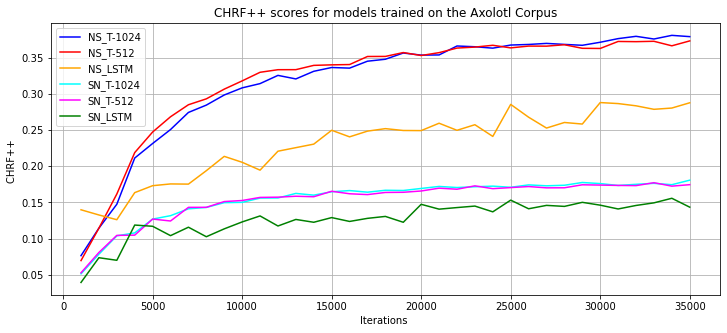

In [71]:
plt.figure(figsize=(12,5))

ax1 = x.CHRFpp.plot(color='blue', grid=True, label='NS_T-1024')
ax2 = x2.CHRFpp.plot(color='red', grid=True, label='NS_T-512')
ax3 = x3.CHRFpp.plot(color='orange', grid=True, label='NS_LSTM')

ax4 = x4.CHRFpp.plot(color='cyan', grid=True, label='SN_T-1024')
ax5 = x5.CHRFpp.plot(color='magenta', grid=True, label='SN_T-512')
ax6 = x6.CHRFpp.plot(color='green', grid=True, label='SN_LSTM')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()


plt.title("CHRF++ scores for models trained on the Axolotl Corpus")


plt.xlabel('Iterations ')
plt.ylabel('CHRF++ ')
plt.legend(h1, l1, loc=2)
plt.show()

# Models Trained on the Wixarika Spanish corpus

In [72]:
x = retrieve_evaluations('evaluation/WS_T-1024')
x2 = retrieve_evaluations('evaluation/WS_T-512')
x3 = retrieve_evaluations('evaluation/WS_LSTM')
x4 = retrieve_evaluations('evaluation/SW_T-1024')
x5 = retrieve_evaluations('evaluation/SW_T-512')
x6 = retrieve_evaluations('evaluation/SW_LSTM')

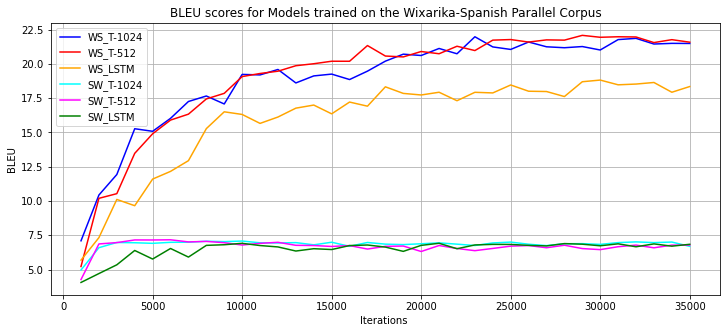

In [73]:
plt.figure(figsize=(12,5))

ax1 = x.BLEU.plot(color='blue', grid=True, label='WS_T-1024')
ax2 = x2.BLEU.plot(color='red', grid=True, label='WS_T-512')
ax3 = x3.BLEU.plot(color='orange', grid=True, label='WS_LSTM')

ax4 = x4.BLEU.plot(color='cyan', grid=True, label='SW_T-1024')
ax5 = x5.BLEU.plot(color='magenta', grid=True, label='SW_T-512')
ax6 = x6.BLEU.plot(color='green', grid=True, label='SW_LSTM')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()


plt.title("BLEU scores for Models trained on the Wixarika-Spanish Parallel Corpus")

plt.xlabel('Iterations ')
plt.ylabel('BLEU')
plt.legend(h1, l1, loc=2)
plt.show()

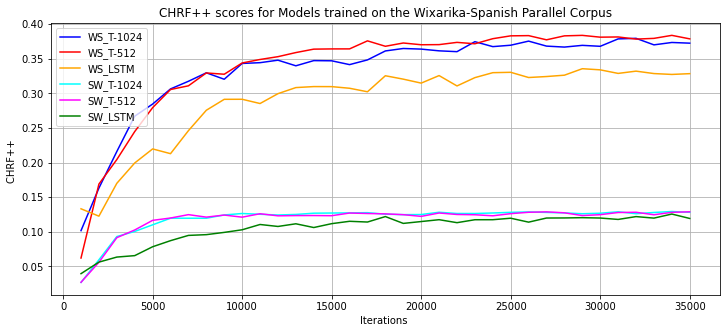

In [74]:
plt.figure(figsize=(12,5))

ax1 = x.CHRFpp.plot(color='blue', grid=True, label='WS_T-1024')
ax2 = x2.CHRFpp.plot(color='red', grid=True, label='WS_T-512')
ax3 = x3.CHRFpp.plot(color='orange', grid=True, label='WS_LSTM')

ax4 = x4.CHRFpp.plot(color='cyan', grid=True, label='SW_T-1024')
ax5 = x5.CHRFpp.plot(color='magenta', grid=True, label='SW_T-512')
ax6 = x6.CHRFpp.plot(color='green', grid=True, label='SW_LSTM')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()



plt.title("CHRF++ scores for Models trained on the Wixarika-Spanish Parallel Corpus")

plt.xlabel('Iterations ')
plt.ylabel('CHRF++ ')

plt.legend(h1, l1, loc=2)
plt.show()